In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from typing import Tuple

def mandelbrot_iterator(real_start : float = -2.25, 
                        real_end : float = 0.75, 
                        real_nr_pixels : int = 1000, 
                        imag_start : complex = -1j, 
                        imag_end : complex = 1j, 
                        imag_nr_pixels : int = 1000,
                        initial_z : complex = 0, 
                        exponent : complex = 2,
                        nr_iterations : int = 100,
                        classification_threshold : float = 1) -> (np.ndarray[complex, Tuple[int, int]], np.array, np.array):
    
    """Performs mandelbrot iteration with given parameters on complex grid 
    Returns Dataframe containing complex results grid after n_iterations"""
    
    #Define the Mandelbrot function:
    mandelbrot_funct = lambda z, c, exp: z ** exp + c
    
    #create c as as grid/ matrix representing complex space of specified properties
    c_real = np.linspace(real_start, real_end, real_nr_pixels)
    c_imag = np.linspace(imag_start, imag_end, imag_nr_pixels)
    c_real_grid, c_imag_grid = np.meshgrid(c_real, c_imag)
    c = c_real_grid + c_imag_grid

    #init z and results array
    z = np.full_like(c, initial_z, dtype=complex)
    diverges_at_iter = np.full_like(c, 0, dtype=int) #init with nr_iterations, as this is highest value possible
    
    for i in range(nr_iterations):
        z = mandelbrot_funct(z, c, exponent)
        not_diverged_yet = np.abs(z) <= classification_threshold
        diverges_at_iter[not_diverged_yet] = i
        
    #format results and set col names and index as grid values
    diverges_at_iter = pd.DataFrame(diverges_at_iter).rename(columns = {dflt : c_real for dflt, c_real in enumerate(c_real)}, 
                                                   index = {dflt : c_imag.imag for dflt, c_imag in enumerate(c_imag)})

    #return z and axis
    return diverges_at_iter

In [2]:
def plot_mandelbrot(diverges_at_iter : pd.DataFrame,
                    fig_size : Tuple = (15,15),
                    title : str = None,
                    show_color_bar : bool = False) -> None:
    
    """plots mandelbrot distribution from encoded df"""

    #plot mandelbrot image
    plt.figure(figsize=fig_size)
    plt.imshow(diverges_at_iter, 
               cmap="plasma",
               aspect="equal", 
               extent=[float(diverges_at_iter.columns[0]), float(diverges_at_iter.columns[-1]), 
                       float(diverges_at_iter.index[0]), float(diverges_at_iter.index[-1])])
    plt.title(title)
    
    if show_color_bar:
        plt.colorbar()
        
    plt.show
    
    #return None, only plot
    return None

/var/folders/yt/pqfxnjw546x3zyhzb5pv_q4r0000gn/T/ipykernel_47505/4016560168.py:22: RuntimeWarning: overflow encountered in square
  mandelbrot_funct = lambda z, c, exp: z ** exp + c
/var/folders/yt/pqfxnjw546x3zyhzb5pv_q4r0000gn/T/ipykernel_47505/4016560168.py:22: RuntimeWarning: invalid value encountered in square
  mandelbrot_funct = lambda z, c, exp: z ** exp + c
/var/folders/yt/pqfxnjw546x3zyhzb5pv_q4r0000gn/T/ipykernel_47505/4016560168.py:36: RuntimeWarning: overflow encountered in absolute
  not_diverged_yet = np.abs(z) <= classification_threshold


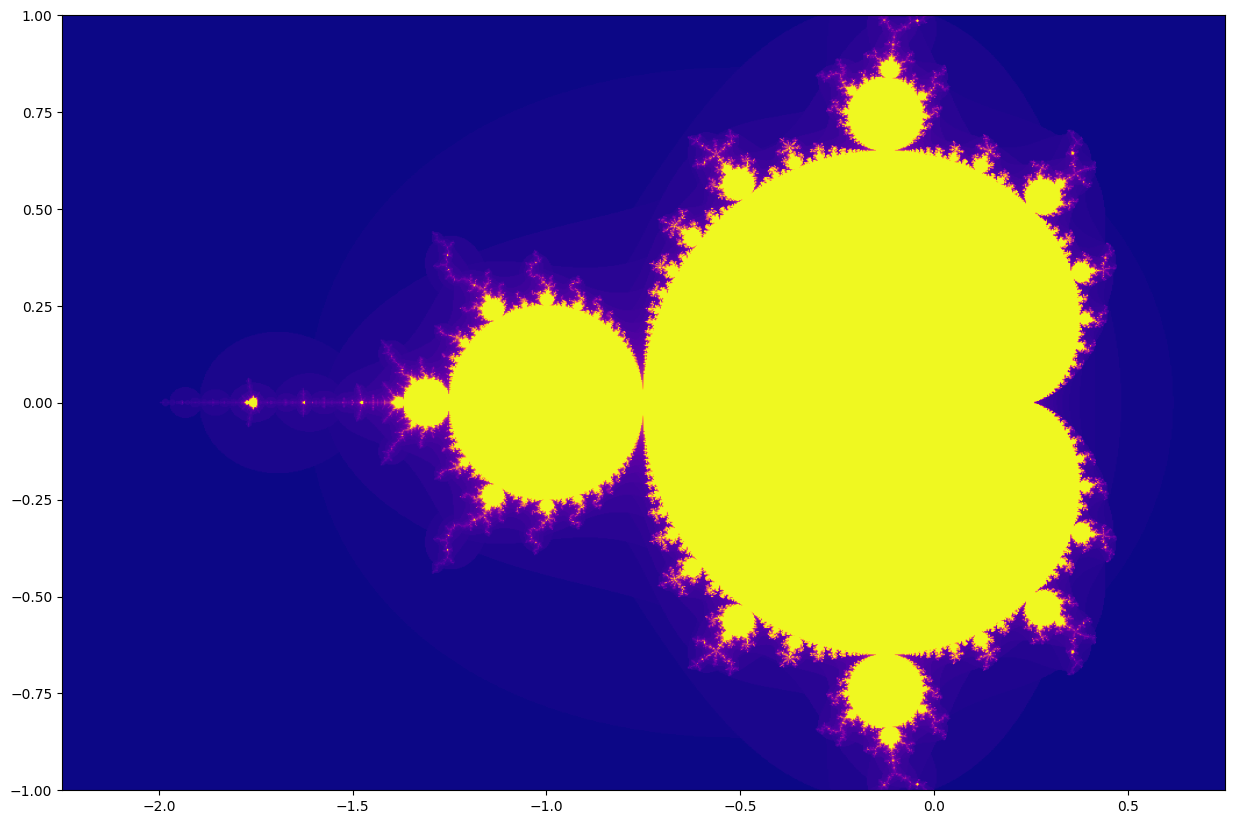

In [3]:
#test out full functionality (default values)
diverges_at_iter = mandelbrot_iterator(classification_threshold=1)
plot_mandelbrot(diverges_at_iter)

/var/folders/yt/pqfxnjw546x3zyhzb5pv_q4r0000gn/T/ipykernel_47505/4016560168.py:22: RuntimeWarning: overflow encountered in square
  mandelbrot_funct = lambda z, c, exp: z ** exp + c
/var/folders/yt/pqfxnjw546x3zyhzb5pv_q4r0000gn/T/ipykernel_47505/4016560168.py:22: RuntimeWarning: invalid value encountered in square
  mandelbrot_funct = lambda z, c, exp: z ** exp + c
/var/folders/yt/pqfxnjw546x3zyhzb5pv_q4r0000gn/T/ipykernel_47505/4016560168.py:36: RuntimeWarning: overflow encountered in absolute
  not_diverged_yet = np.abs(z) <= classification_threshold


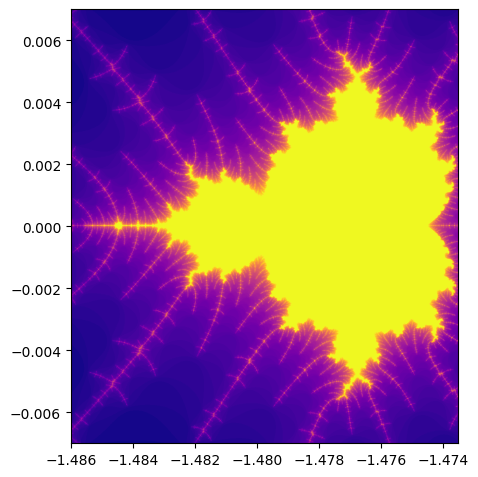

In [4]:
#test out full adjustable functionality (keyword args)
diverges_at = mandelbrot_iterator(real_start = -1.486, 
                                  real_end = -1.4735, 
                                  real_nr_pixels = 1000, 
                                  imag_start = -0.007j, 
                                  imag_end = 0.007j, 
                                  imag_nr_pixels = 2000,
                                  initial_z = 0, 
                                  exponent = 2,
                                  nr_iterations = 100,
                                  classification_threshold = 2)

plot_mandelbrot(diverges_at, fig_size = (5,10), show_color_bar = False)

/var/folders/yt/pqfxnjw546x3zyhzb5pv_q4r0000gn/T/ipykernel_47505/4016560168.py:22: RuntimeWarning: overflow encountered in square
  mandelbrot_funct = lambda z, c, exp: z ** exp + c
/var/folders/yt/pqfxnjw546x3zyhzb5pv_q4r0000gn/T/ipykernel_47505/4016560168.py:22: RuntimeWarning: invalid value encountered in square
  mandelbrot_funct = lambda z, c, exp: z ** exp + c
/var/folders/yt/pqfxnjw546x3zyhzb5pv_q4r0000gn/T/ipykernel_47505/4016560168.py:36: RuntimeWarning: overflow encountered in absolute
  not_diverged_yet = np.abs(z) <= classification_threshold


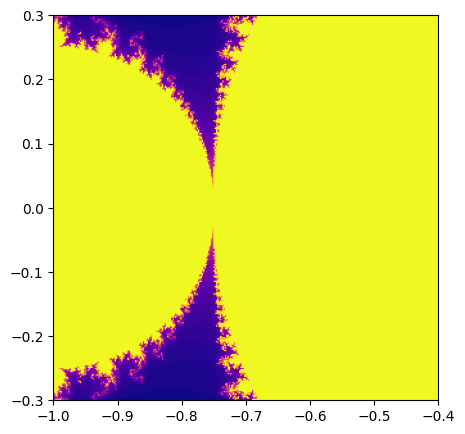

In [5]:
#test out full adjustable functionality (keyword args)
diverges_at = mandelbrot_iterator(real_start = -1, 
                                  real_end = -0.4, 
                                  real_nr_pixels = 300, 
                                  imag_start = -0.3j, 
                                  imag_end = 0.3j, 
                                  imag_nr_pixels = 300,
                                  initial_z = 0, 
                                  exponent = 2,
                                  nr_iterations = 100)

plot_mandelbrot(diverges_at, fig_size = (5,5))

In [6]:
"""Calculate raw data points"""

#Get raw data points 
df = mandelbrot_iterator(real_start = -1, 
                                  real_end = -0.4, 
                                  real_nr_pixels = 500, 
                                  imag_start = -0.3j, 
                                  imag_end = 0.3j, 
                                  imag_nr_pixels = 500,
                                  initial_z = 0, 
                                  exponent = 2,
                                  nr_iterations = 100)

#get dimension for later usage
c_real = np.float64(df.columns)
c_imag = df.index

#transpose/ transform data from shape (1000, 1000) -> (1000000, 3)
data = pd.melt(df.reset_index(), id_vars= "index", value_vars=df.columns[1:]).astype({"variable": float})

/var/folders/yt/pqfxnjw546x3zyhzb5pv_q4r0000gn/T/ipykernel_47505/4016560168.py:22: RuntimeWarning: overflow encountered in square
  mandelbrot_funct = lambda z, c, exp: z ** exp + c
/var/folders/yt/pqfxnjw546x3zyhzb5pv_q4r0000gn/T/ipykernel_47505/4016560168.py:22: RuntimeWarning: invalid value encountered in square
  mandelbrot_funct = lambda z, c, exp: z ** exp + c
/var/folders/yt/pqfxnjw546x3zyhzb5pv_q4r0000gn/T/ipykernel_47505/4016560168.py:36: RuntimeWarning: overflow encountered in absolute
  not_diverged_yet = np.abs(z) <= classification_threshold


In [7]:
#rename columns and inspect data
data.columns = ["imag_part", "real_part", "diverges_at_iter"]

print(f"Data is {round(data.memory_usage(deep=True).sum() / (1024 ** 2))} Megabytes big")
data.head(20)

Data is 6 Megabytes big


,imag_part,real_part,diverges_at_iter
0,-0.300000,-0.998798,39
1,-0.298798,-0.998798,37
2,-0.297595,-0.998798,32
3,-0.296393,-0.998798,31
4,-0.295190,-0.998798,44
5,-0.293988,-0.998798,77
6,-0.292786,-0.998798,48
7,-0.291583,-0.998798,41
8,-0.290381,-0.998798,71
9,-0.289178,-0.998798,73


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

"""Prepare raw data for DL Model"""

#create features, targets
X = data[["real_part", "imag_part"]]
y = data[["diverges_at_iter"]]

#create preprocessor pipe
#X_preprocessor_pipe = make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=2), MinMaxScaler())
y_preprocessor_pipe = make_pipeline(MinMaxScaler())
X_preprocessor_pipe = make_pipeline(MinMaxScaler())

#standardscale all data 
X_trans = X_preprocessor_pipe.fit_transform(X)
y_trans = y_preprocessor_pipe.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(187125, 2) (62375, 2) (187125, 1) (62375, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.config import set_visible_devices

#decide wheather to use GPU or not
use_gpu = True
if not use_gpu:
    set_visible_devices([], 'GPU')

def initialize_model():                                                                

    """Create model architecture"""

    model = Sequential()

    model.add(Dense(128, activation=LeakyReLU(), input_shape = (X_trans.shape[1],)))
    model.add(Dense(256, activation=LeakyReLU(alpha=0.01)))
    model.add(Dense(256, activation=LeakyReLU(alpha=0.01)))
    model.add(Dense(128, activation=LeakyReLU(alpha=0.01)))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(
            loss = "mse", 
            optimizer = Adam(learning_rate=0.001), 
            metrics = ["mae"]
        )

    return model

In [13]:
"""Initialise and inspect model"""

model = initialize_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               300       
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 30701 (119.93 KB)
Trainable params: 30701 (119.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
from tensorflow.keras.callbacks import EarlyStopping, Callback, ReduceLROnPlateau

"""train neural network"""

#create custom callback storing model at each epoch
class ModelCheckpointList(Callback):
    def __init__(self):
        super(ModelCheckpointList, self).__init__()
        self.models = []

    def on_epoch_end(self, epoch, logs=None):
        # Save the model's architecture and weights
        config = self.model.get_config()
        weights = self.model.get_weights()

        # Recreate a new model from the architecture and weights
        new_model = Sequential.from_config(config)
        new_model.set_weights(weights)

        # Append the model to the list
        self.models.append(new_model)

#init model
model = initialize_model()

#define callbacks
early_stopping = EarlyStopping(patience = 10, monitor = "val_loss", restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience = 5, min_lr=0.00001)
checkpoint_list_callback = ModelCheckpointList()

#train model (always with ca. batch_size = 1000)
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 10,
    callbacks = [early_stopping, reduce_lr, checkpoint_list_callback])

Epoch 1/10


2023-09-02 18:14:03.355327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-02 18:14:03.374074: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-09-02 18:14:03.383122: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


4679/4679 [==============================] - ETA: 0s - loss: 0.0167 - mae: 0.0469

2023-09-02 18:14:27.755246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-02 18:14:27.761911: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-09-02 18:14:27.765459: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


4679/4679 [==============================] - 27s 6ms/step - loss: 0.0167 - mae: 0.0469 - val_loss: 0.0084 - val_mae: 0.0282 - lr: 0.0010
Epoch 2/10
4679/4679 [==============================] - 27s 6ms/step - loss: 0.0108 - mae: 0.0319 - val_loss: 0.0082 - val_mae: 0.0286 - lr: 0.0010
Epoch 3/10
4679/4679 [==============================] - 27s 6ms/step - loss: 0.0101 - mae: 0.0301 - val_loss: 0.0090 - val_mae: 0.0277 - lr: 0.0010
Epoch 4/10
4679/4679 [==============================] - 26s 5ms/step - loss: 0.0099 - mae: 0.0294 - val_loss: 0.0115 - val_mae: 0.0314 - lr: 0.0010
Epoch 5/10
4679/4679 [==============================] - 27s 6ms/step - loss: 0.0096 - mae: 0.0287 - val_loss: 0.0080 - val_mae: 0.0254 - lr: 0.0010
Epoch 6/10
4679/4679 [==============================] - 26s 6ms/step - loss: 0.0093 - mae: 0.0279 - val_loss: 0.0079 - val_mae: 0.0259 - lr: 0.0010
Epoch 7/10
4679/4679 [==============================] - 26s 6ms/step - loss: 0.0091 - mae: 0.0273 - val_loss: 0.0113 - val_

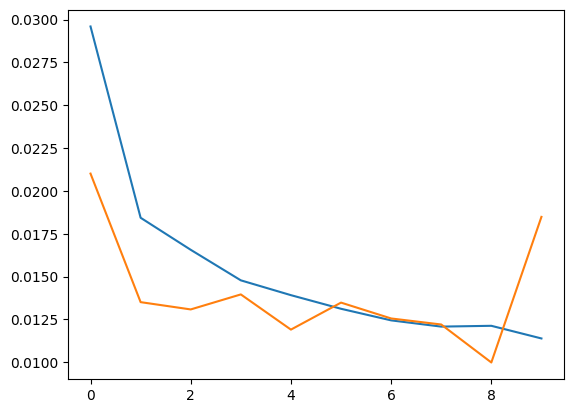

In [27]:
#plot loss and val los
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [45]:
#get predicitons for each pixel in original grid from final model
predictions = model.predict(X_trans, batch_size=int(len(X_train) / 100))
predictions



 70/134 [==============>...............] - ETA: 0s

2023-08-22 22:23:46.002320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:23:46.005864: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:23:46.007919: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


134/134 [==============================] - 0s 2ms/step


array([[0.7241294 ],
       [0.7468966 ],
       [0.76830107],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]], dtype=float32)

In [46]:
#inverse transform predicitions
predictions = y_preprocessor_pipe.inverse_transform(predictions)
predictions

array([[73.06816],
       [75.20828],
       [77.2203 ],
       ...,
       [99.00001],
       [99.00001],
       [99.00001]], dtype=float32)

In [47]:
#load predictions into df and convert to grid 
prediciton_df = pd.DataFrame({"real_part" : X["real_part"], "imag_part" : X["imag_part"], "prediction" : predictions[:,0]})
prediciton_df = prediciton_df.pivot(index = "imag_part", columns = "real_part", values = "prediction")
prediciton_df.head(10)

real_part,-0.998798,-0.997595,-0.996393,-0.995190,-0.993988,-0.992786,-0.991583,-0.990381,-0.989178,-0.987976,...,-0.410822,-0.409619,-0.408417,-0.407214,-0.406012,-0.404810,-0.403607,-0.402405,-0.401202,-0.400000
imag_part,,,,,,,,,,,,,,,,,,,,,
-0.300000,73.068161,69.385399,65.505119,61.416889,57.188667,53.317360,49.612717,46.083778,42.759186,39.415382,...,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008
-0.298798,75.208282,71.626465,67.898705,63.934189,59.779491,55.580200,51.698170,48.038872,44.591633,41.210793,...,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008
-0.297595,77.220299,73.834480,70.202187,66.378983,62.333809,58.121590,53.953999,50.113113,46.499001,43.040062,...,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008
-0.296393,79.152664,75.922607,72.413918,68.740891,64.825455,60.708420,56.448135,52.278915,48.531982,44.960045,...,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008
-0.295190,80.937576,77.900688,74.582054,71.009712,67.241692,63.241661,59.061188,54.763172,50.706539,46.943661,...,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008
-0.293988,82.611649,79.769768,76.608047,73.194687,69.570312,65.707550,61.630367,57.396011,53.071815,49.091103,...,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008
-0.292786,84.190506,81.512474,78.549217,75.300461,71.798546,68.091942,64.140808,59.995045,55.718506,51.394012,...,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008
-0.291583,85.660553,83.156570,80.375832,77.277580,73.943481,70.382423,66.576561,62.544601,58.340275,53.988422,...,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008
-0.290381,86.959938,84.702164,82.082069,79.187180,75.978859,72.564980,68.925835,65.026855,60.922451,56.638969,...,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008,99.000008


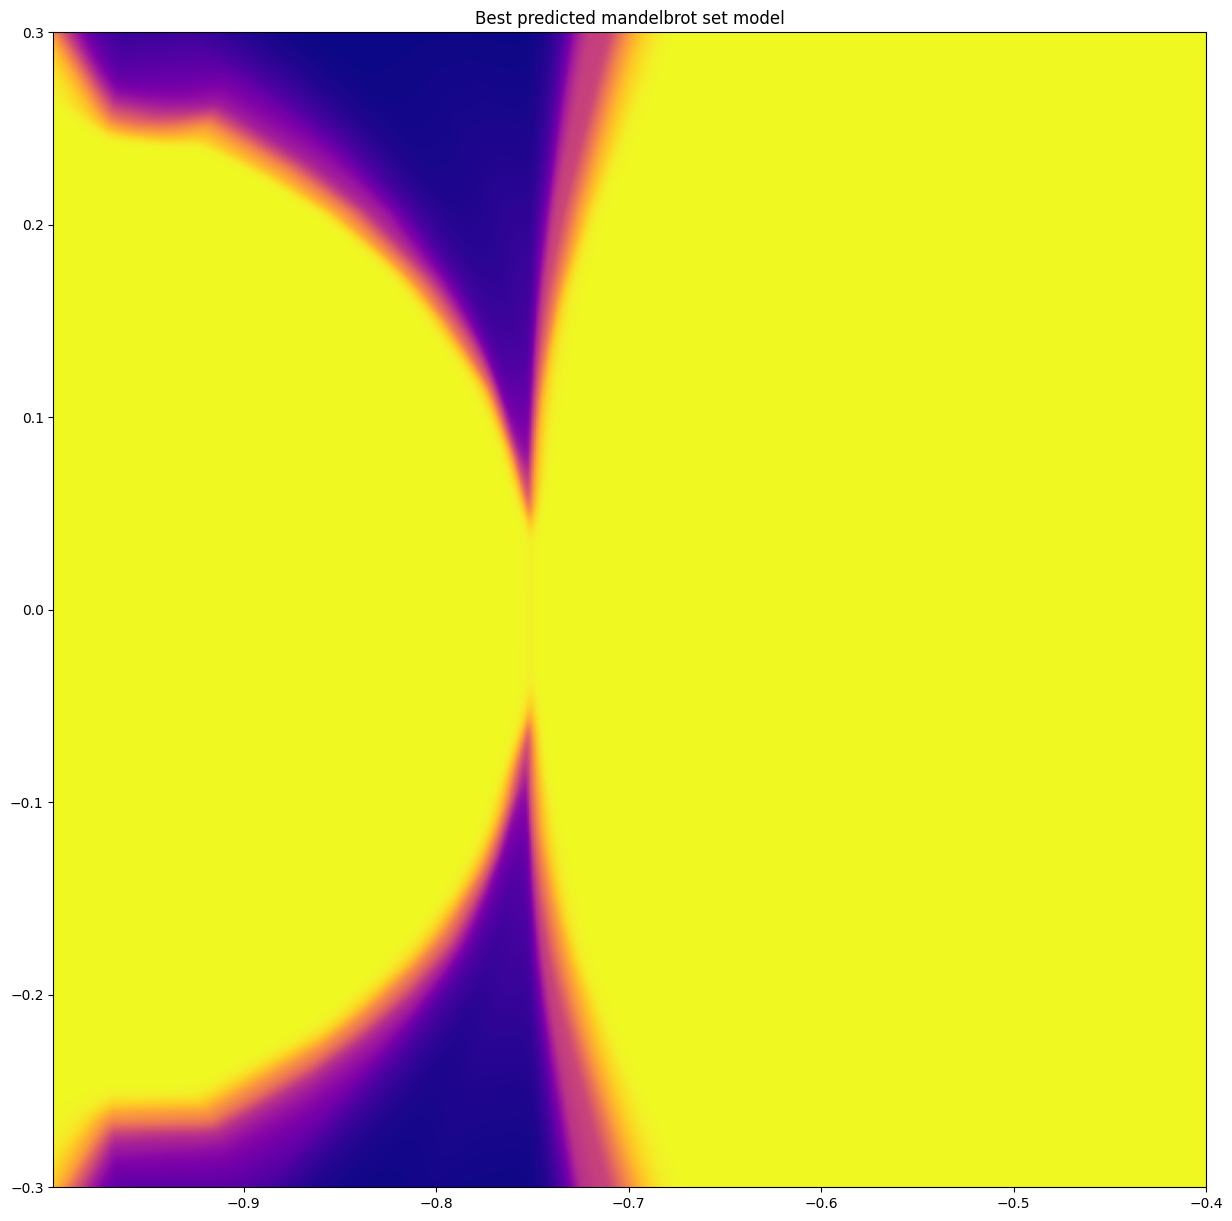

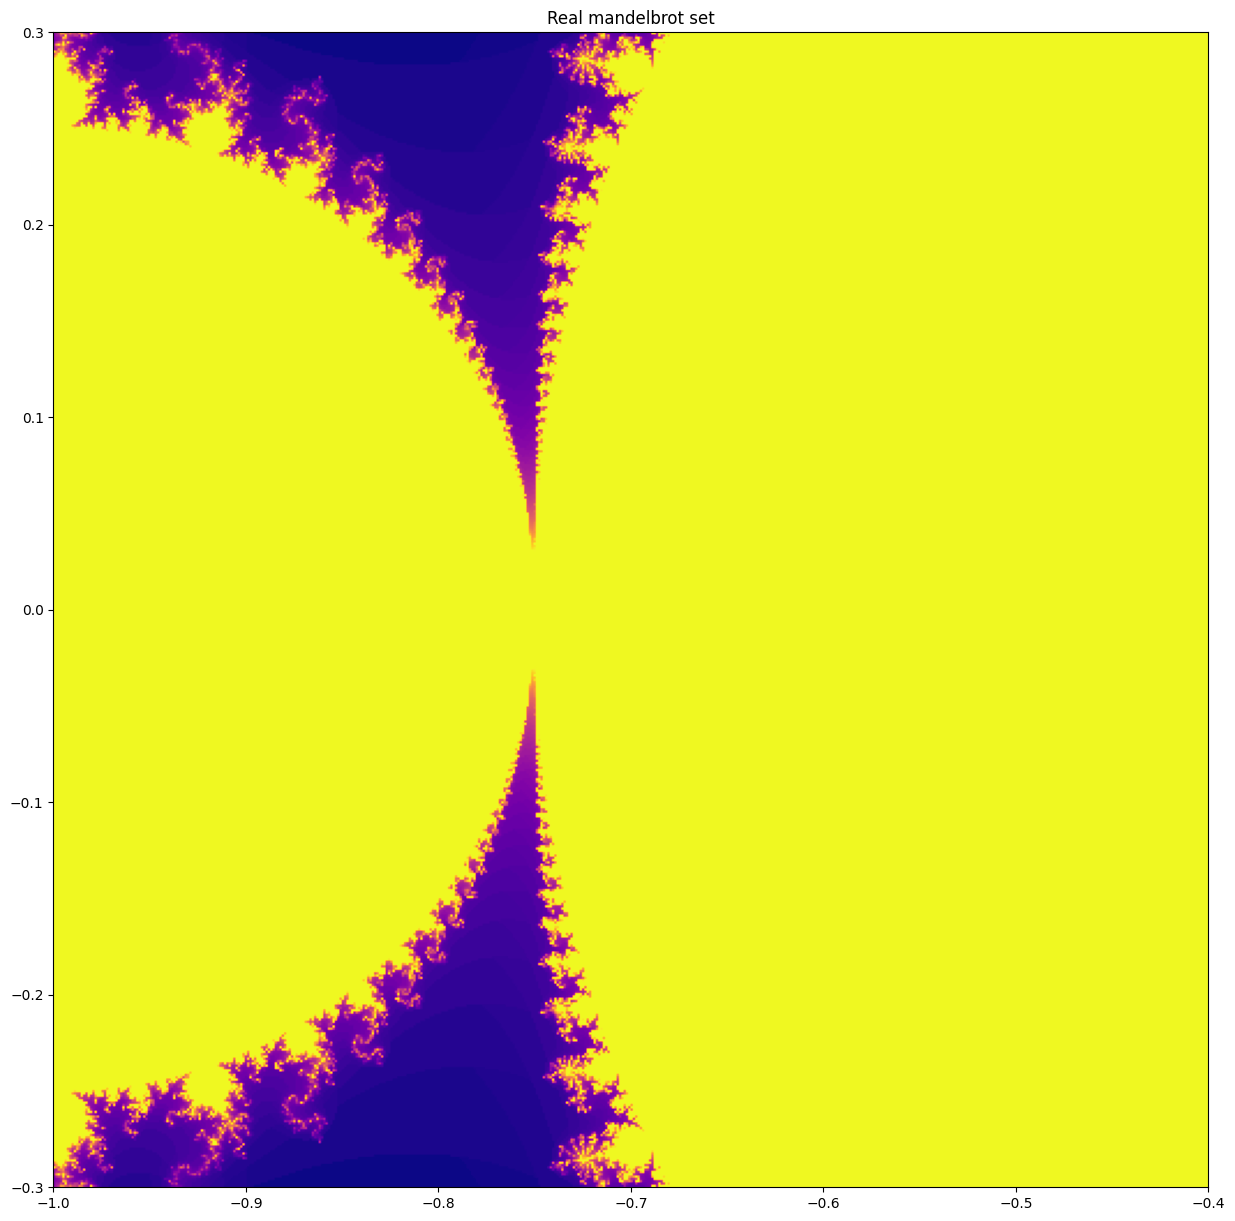

In [48]:
#plot predictions vs real values
plot_mandelbrot(prediciton_df, fig_size = (15,15), title = "Best predicted mandelbrot set model")
plot_mandelbrot(df, fig_size = (15,15), title = "Real mandelbrot set")


In [ ]:
X_trans

array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.00040008e-04],
       [0.00000000e+00, 4.00080016e-04],
       ...,
       [1.00000000e+00, 9.99599920e-01],
       [1.00000000e+00, 9.99799960e-01],
       [1.00000000e+00, 1.00000000e+00]])

In [36]:
import ipywidgets as widgets

"""create predictions for each of the saved (via custom callback) models after each epoch"""

#step size between epochs
step_size = 1

#init results df, that will contain predictions per model
prediction_dfs = []

#iterate over each model in each epoch
for epoch in range(0, len(checkpoint_list_callback.models), step_size):

    #get model at epoch 
    model = checkpoint_list_callback.models[epoch]
    
    #calc predicitons
    predictions = model.predict(X_trans, verbose=1, batch_size = int(len(X_train) / 1000))

    #detransform predicitions
    predictions = y_preprocessor_pipe.inverse_transform(predictions)

    #load predictions into df and convert to grid 
    prediction_df = pd.DataFrame({"real_part" : X["real_part"], "imag_part" : X["imag_part"], "prediction" : predictions[:,0]})
    prediction_df = prediction_df.pivot(index = "imag_part", columns = "real_part", values = "prediction")
    prediction_df.head(10)

    #save result
    prediction_dfs.append(prediction_df)

 137/1335 [==>...........................] - ETA: 1s

2023-08-22 22:12:02.621996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:12:02.625656: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:12:02.627707: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


 154/1335 [==>...........................] - ETA: 1s

2023-08-22 22:12:04.446797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:12:04.450163: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:12:04.452199: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


 155/1335 [==>...........................] - ETA: 1s

2023-08-22 22:12:06.055815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:12:06.059167: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:12:06.061173: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


 152/1335 [==>...........................] - ETA: 1s

2023-08-22 22:12:07.586777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:12:07.590442: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:12:07.592655: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


 151/1335 [==>...........................] - ETA: 1s

2023-08-22 22:12:09.134251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:12:09.137821: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:12:09.139941: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


 148/1335 [==>...........................] - ETA: 1s

2023-08-22 22:12:10.672720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:12:10.676075: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:12:10.678091: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


 153/1335 [==>...........................] - ETA: 1s

2023-08-22 22:12:12.215670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:12:12.219171: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:12:12.221196: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


 153/1335 [==>...........................] - ETA: 1s

2023-08-22 22:12:13.730129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:12:13.733583: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:12:13.735640: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


 151/1335 [==>...........................] - ETA: 1s

2023-08-22 22:12:15.254184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:12:15.257476: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:12:15.259478: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


 155/1335 [==>...........................] - ETA: 1s

2023-08-22 22:12:16.952902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:12:16.956573: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:12:16.958842: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


1335/1335 [==============================] - 1s 976us/step


In [49]:
import ipywidgets as widgets

"""create predictions for each of the saved (via custom callback) models after each epoch"""

"""2nd Version, where, only every 10th pixel is shown """

#step size between epochs
step_size = 1

#percentage of pixels to show -> IMPORTANT: I think only works, when it is divisor of both pixel numbers in model training
factor_pixel = 10

#init results df, that will contain predictions per model
prediction_dfs = []

#iterate over each model in each epoch
for epoch in range(0, len(checkpoint_list_callback.models), step_size):

    #get model at epoch 
    model = checkpoint_list_callback.models[epoch]
    
    #calc predicitons
    predictions = model.predict(X_trans[::factor_pixel], verbose=1, batch_size = int(len(X_train) / 1000))

    #detransform predicitions
    predictions = y_preprocessor_pipe.inverse_transform(predictions)

    #load predictions into df and convert to grid 
    prediction_df = pd.DataFrame({"real_part" : X["real_part"].iloc[::factor_pixel], "imag_part" : X["imag_part"].iloc[::factor_pixel], "prediction" : predictions[:,0]})
    prediction_df = prediction_df.pivot(index = "imag_part", columns = "real_part", values = "prediction")
    prediction_df.head(10)

    #save result

    prediction_dfs.append(prediction_df)

134/134 [==============================] - 0s 1ms/step


2023-08-22 22:24:10.448283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:24:10.452129: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:24:10.454354: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


134/134 [==============================] - 0s 1ms/step


2023-08-22 22:24:10.694177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:24:10.697816: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:24:10.700196: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


104/134 [======================>.......] - ETA: 0s

2023-08-22 22:24:10.917642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:24:10.921184: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:24:10.923206: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


134/134 [==============================] - 0s 1ms/step


2023-08-22 22:24:11.206640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:24:11.210044: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:24:11.212031: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


134/134 [==============================] - 0s 1ms/step


2023-08-22 22:24:11.455155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:24:11.458501: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:24:11.460490: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


134/134 [==============================] - 0s 1ms/step


2023-08-22 22:24:11.685415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:24:11.688984: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:24:11.691069: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


134/134 [==============================] - 0s 1ms/step


2023-08-22 22:24:11.920587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:24:11.924019: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:24:11.926080: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


134/134 [==============================] - 0s 1ms/step


2023-08-22 22:24:12.179947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:24:12.183943: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:24:12.186222: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


134/134 [==============================] - 0s 1ms/step


2023-08-22 22:24:12.424424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:24:12.427925: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:24:12.430037: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


134/134 [==============================] - 0s 1ms/step


2023-08-22 22:24:12.668512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-22 22:24:12.672125: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-08-22 22:24:12.674116: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


In [ ]:
from IPython.display import clear_output

clear_output(wait=True)

#Function to display the image given an index
def plot_image(i=0):
    plot_mandelbrot(prediction_dfs[i])
    
#Create an interactive slider
widgets.interactive(plot_image, i=(0, len(prediction_dfs) - 1))

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…